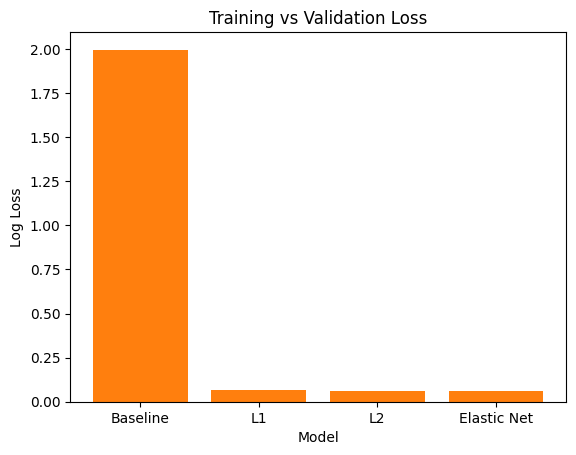

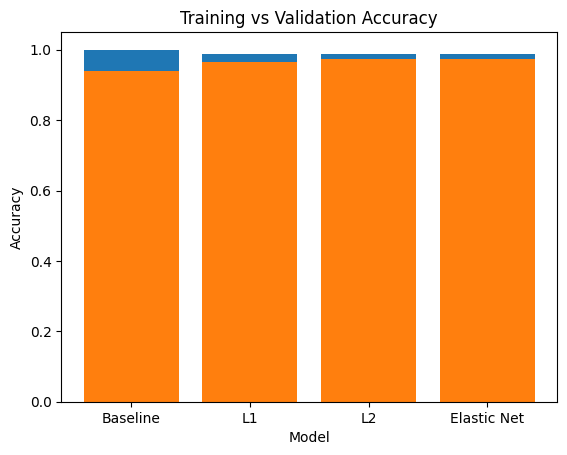

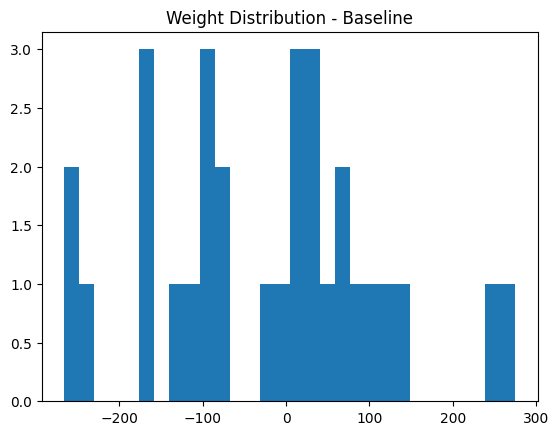

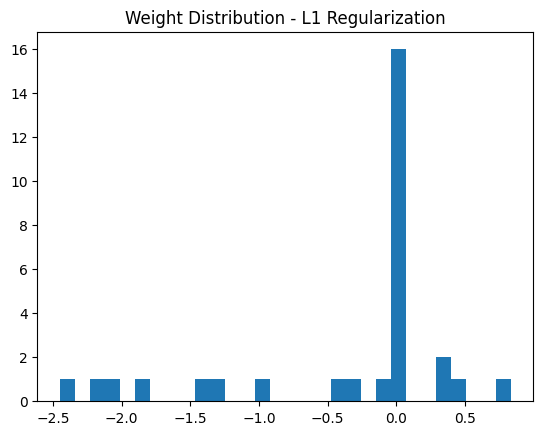

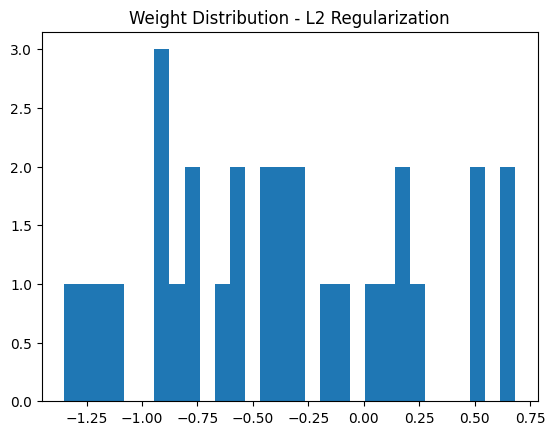

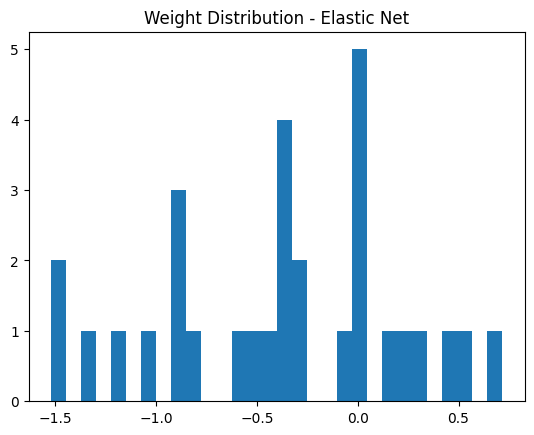

Baseline      : 0.9385964912280702
L1            : 0.9649122807017544
L2            : 0.9736842105263158
Elastic Net   : 0.9736842105263158
Zero weights in L1: 15


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss

df = pd.read_csv("breast_cancer_wisconsin.csv")

X = df.drop("target", axis=1)
y = df["target"]

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

baseline = LogisticRegression(
    penalty=None,
    solver="lbfgs",
    max_iter=5000
)
baseline.fit(X_train, y_train)

train_loss_base = log_loss(y_train, baseline.predict_proba(X_train))
val_loss_base = log_loss(y_val, baseline.predict_proba(X_val))
train_acc_base = accuracy_score(y_train, baseline.predict(X_train))
val_acc_base = accuracy_score(y_val, baseline.predict(X_val))
weights_base = baseline.coef_.flatten()

l1_model = LogisticRegression(
    penalty="l1",
    solver="saga",
    C=1.0,
    max_iter=5000
)
l1_model.fit(X_train, y_train)

train_loss_l1 = log_loss(y_train, l1_model.predict_proba(X_train))
val_loss_l1 = log_loss(y_val, l1_model.predict_proba(X_val))
train_acc_l1 = accuracy_score(y_train, l1_model.predict(X_train))
val_acc_l1 = accuracy_score(y_val, l1_model.predict(X_val))
weights_l1 = l1_model.coef_.flatten()
zero_weights_l1 = np.sum(weights_l1 == 0)

l2_model = LogisticRegression(
    penalty="l2",
    solver="lbfgs",
    C=1.0,
    max_iter=5000
)
l2_model.fit(X_train, y_train)

train_loss_l2 = log_loss(y_train, l2_model.predict_proba(X_train))
val_loss_l2 = log_loss(y_val, l2_model.predict_proba(X_val))
train_acc_l2 = accuracy_score(y_train, l2_model.predict(X_train))
val_acc_l2 = accuracy_score(y_val, l2_model.predict(X_val))
weights_l2 = l2_model.coef_.flatten()

elastic_model = LogisticRegression(
    penalty="elasticnet",
    solver="saga",
    l1_ratio=0.5,
    C=1.0,
    max_iter=5000
)
elastic_model.fit(X_train, y_train)

train_loss_en = log_loss(y_train, elastic_model.predict_proba(X_train))
val_loss_en = log_loss(y_val, elastic_model.predict_proba(X_val))
train_acc_en = accuracy_score(y_train, elastic_model.predict(X_train))
val_acc_en = accuracy_score(y_val, elastic_model.predict(X_val))
weights_en = elastic_model.coef_.flatten()

models = ["Baseline", "L1", "L2", "Elastic Net"]

train_losses = [train_loss_base, train_loss_l1, train_loss_l2, train_loss_en]
val_losses = [val_loss_base, val_loss_l1, val_loss_l2, val_loss_en]

train_accs = [train_acc_base, train_acc_l1, train_acc_l2, train_acc_en]
val_accs = [val_acc_base, val_acc_l1, val_acc_l2, val_acc_en]

plt.figure()
plt.bar(models, train_losses)
plt.bar(models, val_losses)
plt.title("Training vs Validation Loss")
plt.xlabel("Model")
plt.ylabel("Log Loss")
plt.show()

plt.figure()
plt.bar(models, train_accs)
plt.bar(models, val_accs)
plt.title("Training vs Validation Accuracy")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.show()

plt.figure()
plt.hist(weights_base, bins=30)
plt.title("Weight Distribution - Baseline")
plt.show()

plt.figure()
plt.hist(weights_l1, bins=30)
plt.title("Weight Distribution - L1 Regularization")
plt.show()

plt.figure()
plt.hist(weights_l2, bins=30)
plt.title("Weight Distribution - L2 Regularization")
plt.show()

plt.figure()
plt.hist(weights_en, bins=30)
plt.title("Weight Distribution - Elastic Net")
plt.show()

print("Baseline      :", val_acc_base)
print("L1            :", val_acc_l1)
print("L2            :", val_acc_l2)
print("Elastic Net   :", val_acc_en)
print("Zero weights in L1:", zero_weights_l1)


**Interpretation**


The baseline logistic regression model achieved high training accuracy but showed slightly lower validation accuracy, indicating overfitting due to unrestricted weight growth. L1 regularization increased training loss marginally while improving generalization by driving several weights to zero, thereby performing feature selection. L2 regularization produced the most stable performance, with closely matched training and validation accuracy and uniformly reduced weight magnitudes, making it effective for correlated features in the dataset. Elastic Net combined the advantages of both L1 and L2 by achieving partial sparsity along with controlled weight shrinkage. Overall, regularization reduced overfitting and improved generalization, with L2 regularization emerging as the most suitable technique for the Breast Cancer Wisconsin dataset.